In [ ]:
from importlib import reload
import read_csv_data

read_csv_data = reload(read_csv_data)

csv_file_path = 'data/nba_players/all_seasons.csv'

player_names_heights = read_csv_data.extract_nba_player_names_heights(csv_file_path)



In [ ]:
print(len(player_names_heights))

len(list(player_names_heights.values())[:])

for k in player_names_heights.keys():
    if player_names_heights[k] > 231:
        print(k, player_names_heights[k])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data set
height_data = list(player_names_heights.values())[:]
data = np.array(height_data)

print(type(height_data[0]))
print(data.dtype)

# Manually insert two data points into data
# to make the visualization cleaner..
data = np.append(data, 160.0)
data = np.append(data, 240.0)

# Number of bins
bins = 8

# Calculate histogram
# when you set density=False, the first value of the tuple will be the counts of the bins
counts, bin_edges1 = np.histogram(data, bins=bins, density=False)

sum_counts = sum(counts)
print(sum_counts)
for count in counts:
    print(f'{count}')

print('bin_edges1:', bin_edges1)


# when you set density=True, the total area under the histogram will sum to 1
probs, bin_edges2 = np.histogram(data, bins=bins, density=True)

sum_probs = 0.0
for i, prob in enumerate(probs):
    bin_width = (bin_edges2[i+1] - bin_edges2[i])
    sum_probs += prob * bin_width
    print(f'{prob:.5f} * {bin_width:.2f}')

print(sum_probs)

print('bin_edges2:', bin_edges2)

print(sorted(data))
print('min:', min(data))
print('max:', max(data))

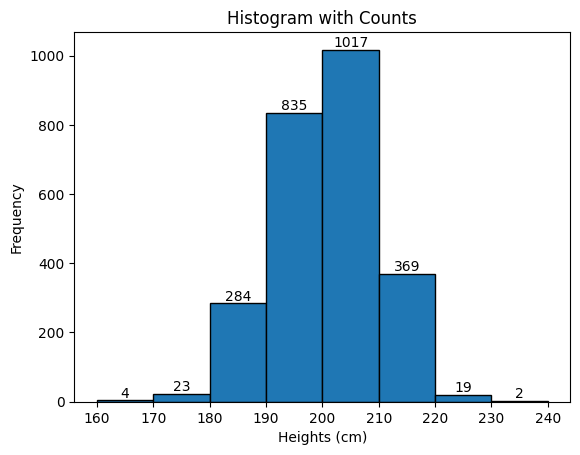

In [66]:
# # Plotting the histogram
# plt.hist(data, bins=bins, edgecolor='black')

# # Adding titles and labels
# plt.title('Histogram of Data')
# plt.xlabel('Value')
# plt.ylabel('Frequency')

# # Showing the plot
# plt.show()

# Create histogram (with count labels ontop of each bar)
# 1. Create the histogram using plt.hist.
# 2. Iterate through the rectangles (bars) of the histogram.
# 3. Use plt.text to place the count on top of each bar

# patches represent the individual bars (rectangles) of the histogram
hist, bins, patches = plt.hist(data, bins=bins, edgecolor='black')

# Annotate each bar with the count
for patch, count in zip(patches, hist):
    plt.text(
        patch.get_x() + patch.get_width() / 2,
        patch.get_height(),
        f'{int(count)}',
        ha='center',
        va='bottom'
    )

# Adding titles and labels
plt.title('Histogram with Counts')
plt.xlabel('Heights (cm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [ ]:

# Calculate bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot PDF
plt.plot(bin_centers, counts, linestyle='-', marker='o')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Probability Density Function')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data set
data = np.array([1, 2, 2, 2.5, 3, 4, 5, 6, 7, 8, 9, 10])

# Number of bins
bins = 10

# Calculate histogram
counts, bin_edges = np.histogram(data, bins=bins, density=True)

# Calculate bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot PDF
plt.plot(bin_centers, counts, linestyle='-', marker='o')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Probability Density Function')
plt.show()
